In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [3]:
large = pd.read_csv('/Users/flatironschool/Absenteeism_Project/data/processed/large_schools.csv')

In [4]:
large.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,5,5,5,ALABAMA,Hoover City,10000700251,Hoover High Sch,714,92,AL,...,898.0,0.302663,160.0,0.053927,1.0,0.000337,434.833734,0.019066,0.001685,0.333651
1,7,7,7,ALABAMA,Hoover City,10000701456,Spain Park High Sch,412,94,AL,...,526.0,0.313655,232.0,0.138342,0.0,0.000000,511.925343,0.016920,0.001789,0.346870
2,8,8,8,ALABAMA,Madison City,10000800831,Bob Jones High Sch,451,97,AL,...,565.0,0.321754,72.0,0.041002,2.0,0.001139,72676.817158,0.000000,0.002278,0.019608
3,9,9,9,ALABAMA,Madison City,10000802198,James Clemens High School,404,96,AL,...,280.0,0.163934,134.0,0.078454,0.0,0.000000,3478.029292,0.000000,0.002635,0.232804
4,12,12,12,ALABAMA,Trussville City,10001301682,Hewitt-Trussville High Sch,381,96,AL,...,799.0,0.554476,28.0,0.019431,2.0,0.001388,3970.929743,0.000000,0.002082,0.231027


## Imputing Mean for Missing Values

In [5]:
#impute mean for numerical vars
large_feat = large[['total_enrollment', 'ap_ib_de_rate', 'sat_act_rate', 'pass_algebra_rate',
      'geometry_rate', 'algebra2_rate', 'calc_rate', 'chronic_absent_rate', 'activities_funds_rate',
      'sports_rate', 'suspensed_day_rate', 'harassed_rate',
      'non_cert_rate','counselor_rate','absent_teacher_rate']]

In [6]:
imputed_numeric_df = large_feat
for i in range(0, len(large_feat.columns)):
    print('im here:', large_feat.columns[i])
    imputed_numeric_df.iloc[:,i].replace(np.NaN, imputed_numeric_df.iloc[:,i].mean(), inplace=True)

im here: total_enrollment
im here: ap_ib_de_rate
im here: sat_act_rate
im here: pass_algebra_rate
im here: geometry_rate
im here: algebra2_rate
im here: calc_rate
im here: chronic_absent_rate
im here: activities_funds_rate
im here: sports_rate
im here: suspensed_day_rate
im here: harassed_rate
im here: non_cert_rate
im here: counselor_rate
im here: absent_teacher_rate


In [7]:
#No missing values
imputed_numeric_df.isna().sum()

total_enrollment         0
ap_ib_de_rate            0
sat_act_rate             0
pass_algebra_rate        0
geometry_rate            0
algebra2_rate            0
calc_rate                0
chronic_absent_rate      0
activities_funds_rate    0
sports_rate              0
suspensed_day_rate       0
harassed_rate            0
non_cert_rate            0
counselor_rate           0
absent_teacher_rate      0
dtype: int64

In [8]:
imputed_numeric_df.head()

,total_enrollment,ap_ib_de_rate,sat_act_rate,pass_algebra_rate,geometry_rate,algebra2_rate,calc_rate,chronic_absent_rate,activities_funds_rate,sports_rate,suspensed_day_rate,harassed_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,2967.0,0.228851,0.416245,0.1866,0.242332,0.056623,0.065723,0.144253,434.833734,0.302663,0.053927,0.000337,0.019066,0.001685,0.333651
1,1677.0,0.409884,0.288014,0.1866,0.269529,0.045915,0.064997,0.171139,511.925343,0.313655,0.138342,0.000000,0.016920,0.001789,0.346870
2,1756.0,0.409884,0.396925,0.1866,0.126424,0.034169,0.068337,0.009112,72676.817158,0.321754,0.041002,0.001139,0.000000,0.002278,0.019608
3,1708.0,0.409884,0.340749,0.1866,0.108314,0.014637,0.045667,0.103630,3478.029292,0.163934,0.078454,0.000000,0.000000,0.002635,0.232804
4,1441.0,0.409884,0.084663,0.1866,0.203331,0.160305,0.045802,0.104788,3970.929743,0.554476,0.019431,0.001388,0.000000,0.002082,0.231027


## Model 1 - Random Forest

In [9]:
y = large['ALL_RATE_1516']

In [10]:
#features to use for prediction came from 
X = imputed_numeric_df

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
rf_trial = RandomForestRegressor(n_estimators=10)

In [22]:
rf_trial.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
rf_trial.score(X_test, y_test)

0.45709488475439874

In [118]:
rf = RandomForestRegressor(n_estimators=500, min_samples_leaf=2)

In [119]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [120]:
rf.score(X_test, y_test)

0.495064776175564

In [121]:
rf.score(X_train, y_train)

0.9055257597216516

In [51]:
rf.feature_importances_

array([3.23940922e-01, 4.02347887e-05, 3.70258511e-02, 1.67243455e-02,
       1.20259293e-02, 1.64893518e-02, 2.89232442e-02, 2.68690127e-01,
       9.06224723e-02, 4.01944453e-02, 1.23619325e-01, 5.04340162e-04,
       1.75597257e-02, 8.81296775e-03, 1.48267182e-02])

In [18]:
large_feat.columns

Index(['total_enrollment', 'ap_ib_de_rate', 'sat_act_rate',
       'pass_algebra_rate', 'geometry_rate', 'algebra2_rate', 'calc_rate',
       'chronic_absent_rate', 'activities_funds_rate', 'sports_rate',
       'suspensed_day_rate', 'harassed_rate', 'non_cert_rate',
       'counselor_rate', 'absent_teacher_rate'],
      dtype='object')

In [20]:
pd.DataFrame(data = [large_feat.columns, rf.feature_importances_])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,total_enrollment,ap_ib_de_rate,sat_act_rate,pass_algebra_rate,geometry_rate,algebra2_rate,calc_rate,chronic_absent_rate,activities_funds_rate,sports_rate,suspensed_day_rate,harassed_rate,non_cert_rate,counselor_rate,absent_teacher_rate
1,0.180365,0.00382176,0.0661581,0.0397369,0.037273,0.0487258,0.0363384,0.188789,0.0680987,0.0586952,0.138929,0.0105564,0.039334,0.0476985,0.035481


## Model 2 - Random Forest Tuning

In [24]:
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(X, y, test_size=0.2)

In [54]:
# Create the random grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 4500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
rf_random = RandomizedSearchCV(estimator = r, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [57]:
rf_random.fit(X_train_tune, y_train_tune)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 89.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 677, 1155, 1633, 2111, 2588, 3066, 3544, 4022, 4500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 677,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [43]:
def evaluate(model, test_features, test_labels):
    predictions = base_model.predict(X_test_tune)
    errors = (predictions - y_test_tune)
    rmse = np.sqrt(np.mean(errors**2)) ### RMSE
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('RMSE = {:0.4f}'.format(rmse))
    
    return rmse

In [42]:
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train_tune, y_train_tune)
base_accuracy = evaluate(base_model, X_test_tune, y_test_tune)

Model Performance
Average Error: -0.3284 degrees.
RMSE = 7.5034


In [47]:
base_model.decision_path(X_test)

(<857x32736 sparse matrix of type '<class 'numpy.int64'>'
 	with 152658 stored elements in Compressed Sparse Row format>,
 array([    0,  3261,  6502,  9801, 12992, 16267, 19530, 22879, 26132,
        29417, 32736]))

In [28]:
y_train_tune

1539     85
2800     96
2112     76
3161     94
2455     76
2924     87
3166    100
3004     95
2462     90
1529     94
453      97
1848     80
2782     65
1762     95
204      95
3302     83
2088     90
2127     95
2819     85
903      92
2541     93
1076     76
1034     90
1947     95
1067     98
2956     77
926     100
3223     95
4178     82
3685     89
       ... 
1230     74
3347     80
2851     85
2095     97
4097     95
1777     95
2726     98
3402     94
4028     93
3107     72
69       92
3600     92
386      92
2429     73
1273     95
1229     74
2744     91
114      92
1102     87
1192     90
390     100
99       92
2629     89
2385     85
4078     92
1616     96
3342     73
2942     20
2126     95
1573     79
Name: ALL_RATE_1516, Length: 3428, dtype: int64

In [61]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_tune, y_test_tune)

Model Performance
Average Error: 4.6368 degrees.
Accuracy = 93.08%.


In [62]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.65%.


## Plotting all features against graduation ALL RATE

Text(0.5, 1.0, 'absent_teacher_rate')

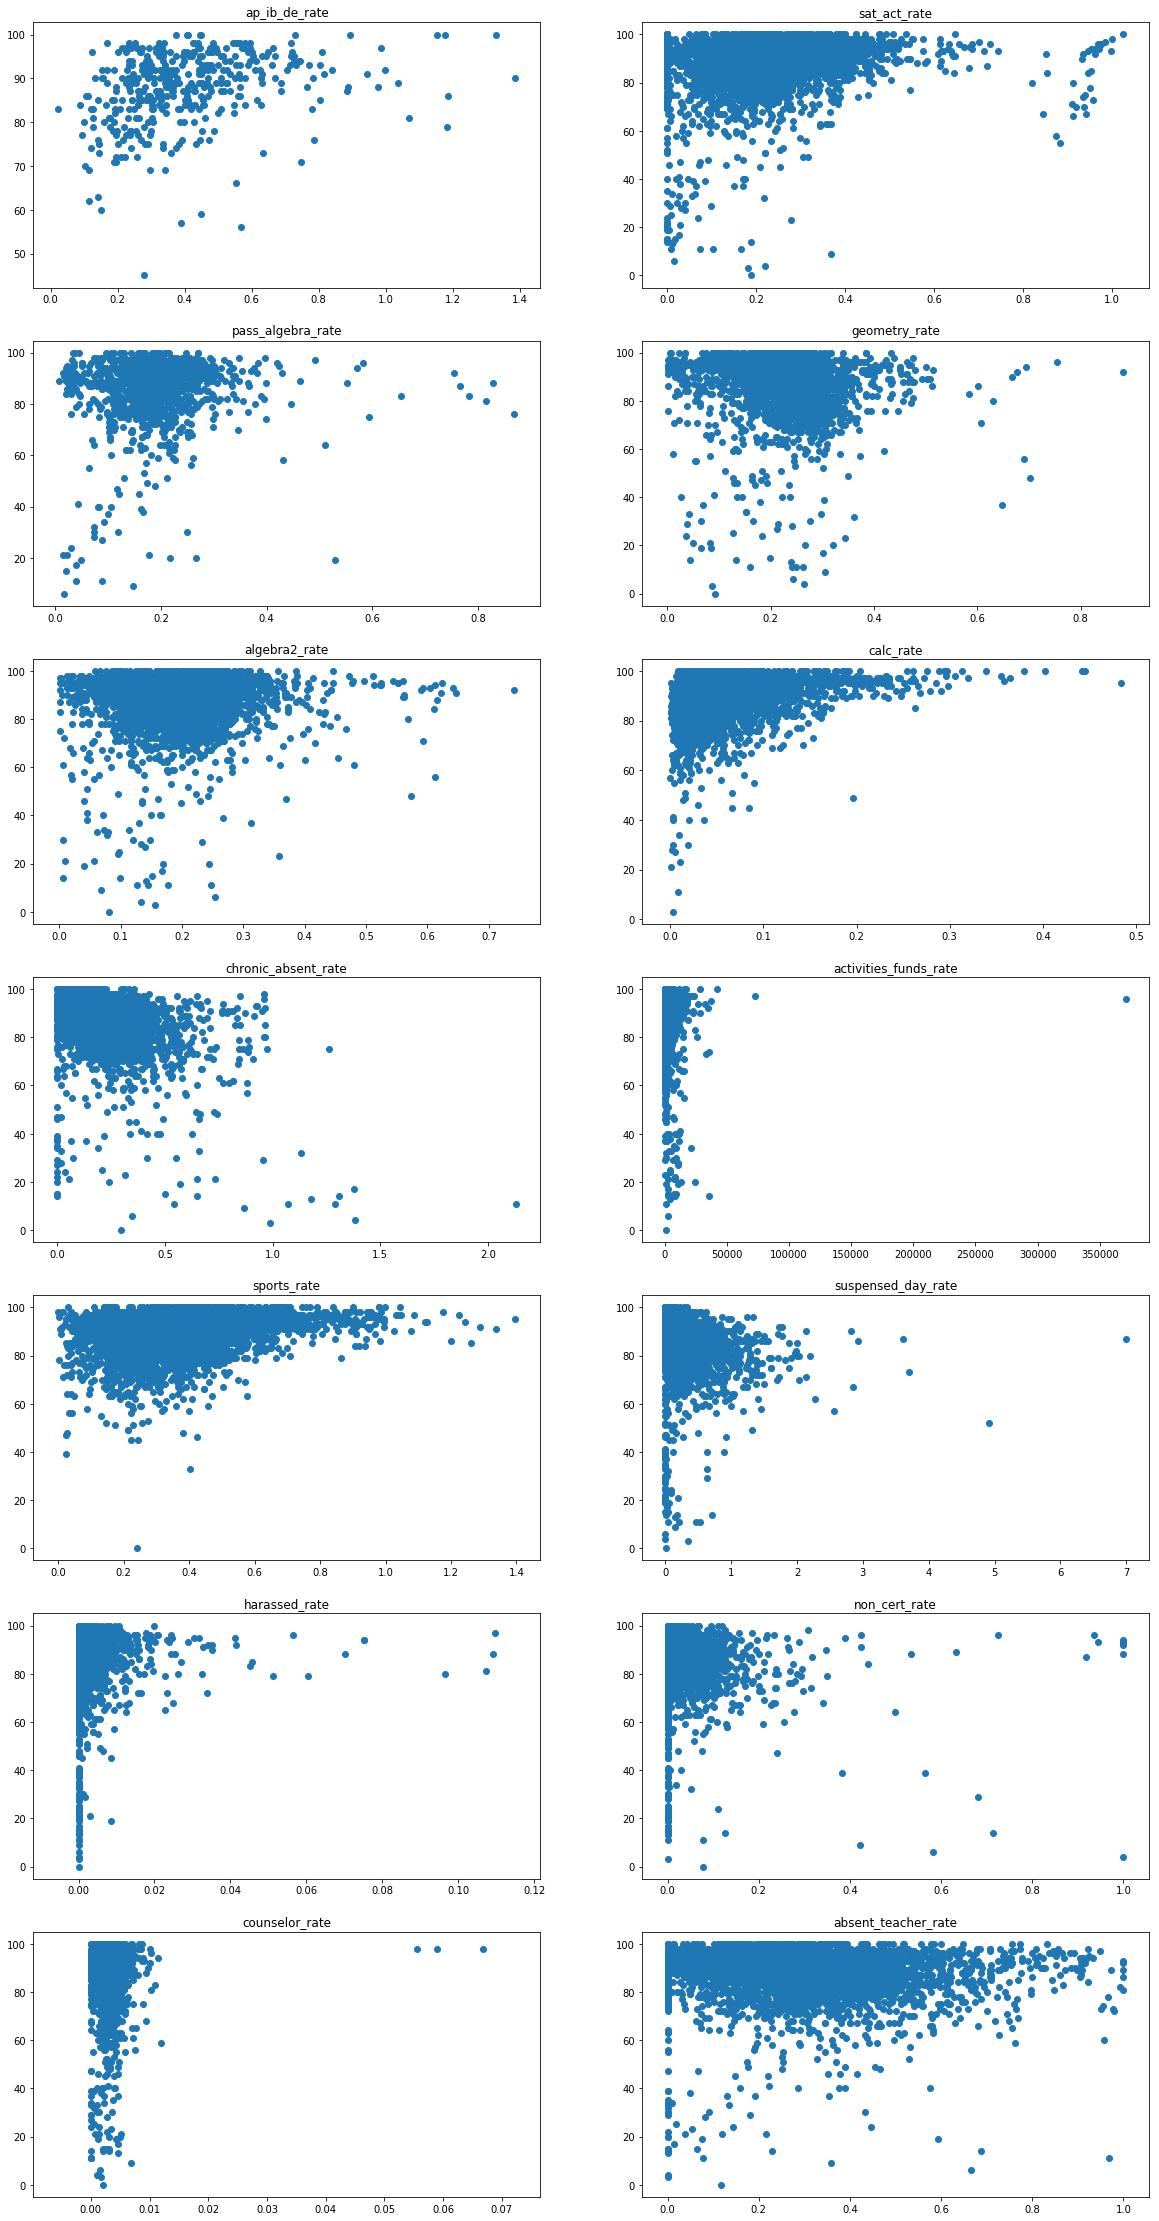

In [43]:
y = large['ALL_RATE_1516']
fig = plt.subplots(nrows=7,ncols=2, figsize=(20,40))

plt.subplot(7, 2, 1)
x = large['ap_ib_de_rate']
plt.scatter(x, y)
plt.title('ap_ib_de_rate')

plt.subplot(7, 2, 2)
x = large['sat_act_rate']
plt.scatter(x, y)
plt.title('sat_act_rate')

plt.subplot(7, 2, 3)
x = large['pass_algebra_rate']
plt.scatter(x, y)
plt.title('pass_algebra_rate')

plt.subplot(7, 2, 4)
x = large['geometry_rate']
plt.scatter(x, y)
plt.title('geometry_rate')

plt.subplot(7, 2, 5)
x = large['algebra2_rate']
plt.scatter(x, y)
plt.title('algebra2_rate')

plt.subplot(7, 2, 6)
x = large['calc_rate']
plt.scatter(x, y)
plt.title('calc_rate')

plt.subplot(7, 2, 7)
x = large['chronic_absent_rate']
plt.scatter(x, y)
plt.title('chronic_absent_rate')

plt.subplot(7, 2, 8)
x = large['activities_funds_rate']
plt.scatter(x, y)
plt.title('activities_funds_rate')

plt.subplot(7, 2, 9)
x = large['sports_rate']
plt.scatter(x, y)
plt.title('sports_rate')

plt.subplot(7, 2, 10)
x = large['suspensed_day_rate']
plt.scatter(x, y)
plt.title('suspensed_day_rate')

plt.subplot(7, 2, 11)
x = large['harassed_rate']
plt.scatter(x, y)
plt.title('harassed_rate')

plt.subplot(7, 2, 12)
x = large['non_cert_rate']
plt.scatter(x, y)
plt.title('non_cert_rate')

plt.subplot(7, 2, 13)
x = large['counselor_rate']
plt.scatter(x, y)
plt.title('counselor_rate')

plt.subplot(7, 2, 14)
x = large['absent_teacher_rate']
plt.scatter(x, y)
plt.title('absent_teacher_rate')